In [21]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
from IPython import display
import csv
from scipy.signal import butter, lfilter

In [22]:
data = []
with open("data/audio_data_6.csv", 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        data.append(float(row['y']))  # Convert to int if y is numeric
    

In [23]:
data

[3.68703,
 8.24461,
 7464.24707,
 10.65951,
 11.08159,
 16.19654,
 9.60364,
 3.74057,
 6.82303,
 4.65078,
 3.42514,
 1.1772,
 4.17159,
 5.29085,
 15.66916,
 7.70208,
 0.86995,
 -0.03992,
 4.74592,
 4.03949,
 4.31253,
 3.11906,
 5.9168,
 9.83122,
 4.28158,
 0.33972,
 1.98923,
 -0.25883,
 1.55338,
 3.97936,
 8.26413,
 12.38708,
 13.70266,
 9.73541,
 5.19865,
 2.29414,
 2.88537,
 2.56769,
 3.89811,
 4.22361,
 5.1329,
 10.41747,
 12.88152,
 7.26145,
 5.05282,
 3.87121,
 0.80616,
 6.76534,
 8.13819,
 12.00655,
 5.6206,
 6.66011,
 10.10083,
 7.69656,
 1.84577,
 2.95058,
 1.84182,
 4.49634,
 7.94838,
 7.18208,
 8.02256,
 8.08609,
 4.46425,
 2.06493,
 2.1809,
 5.34079,
 5.82049,
 0.80381,
 2.43983,
 6.13342,
 7.14174,
 6.1372,
 8.2218,
 6.68886,
 5.73914,
 3.60087,
 9.73855,
 6.6067,
 3.74012,
 6.01043,
 5.9753,
 6.19525,
 5.85047,
 4.05023,
 5.1138,
 8.77924,
 6.47273,
 7.61685,
 10.10187,
 6.91396,
 7.59264,
 8.06715,
 2.28856,
 1.26113,
 4.03336,
 2.6768,
 2.95853,
 4.47968,
 0.4565,
 6.776

In [24]:
len(data)

16000

In [25]:
data = np.array(data, dtype=np.float32)

In [26]:
display.Audio(data, rate=16e3)

In [76]:
resampled = librosa.resample(data, orig_sr=40e3, target_sr=16e3)

In [78]:
display.Audio(resampled[int(3e3):int(19e3)], rate=16e3)

In [80]:
selected = resampled[int(6e3):int(22e3)]

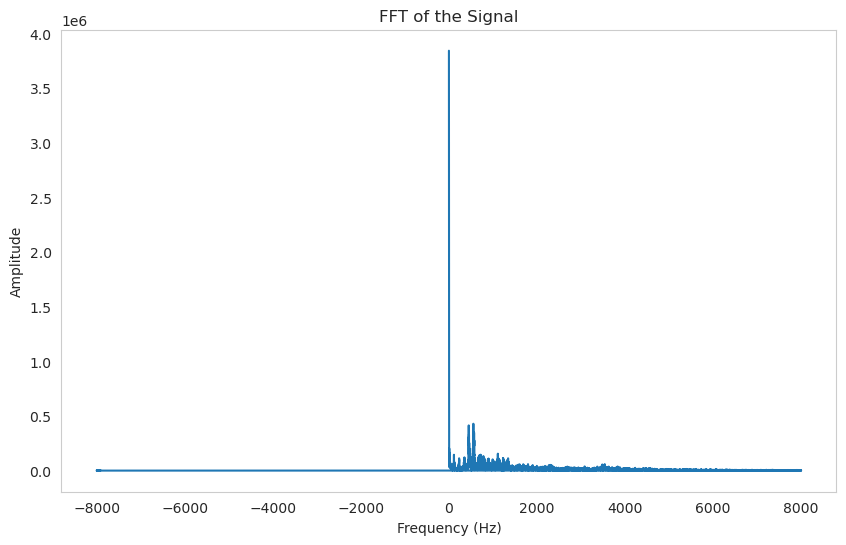

In [10]:
fft_result = np.fft.fft(data)
fft_freqs = np.fft.fftfreq(len(data), d=1/16000)  # Frequency bins

# Plot the FFT
plt.figure(figsize=(10, 6))
plt.plot(fft_freqs[:16000 // 2], np.abs(fft_result)[:16000 // 2])  # One-sided spectrum
plt.title('FFT of the Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [134]:
selected /= np.max(selected)

# Filter raw data with bufferworth filter

In [12]:
fs = 16e3
cutoff = 4e3
nyquist = 0.5 * fs 
normal_cutoff = cutoff / nyquist
b, a = butter(3, normal_cutoff, btype='lowpass', analog=False)

y = lfilter(b, a, data)
y = [0 if item is None else item for item in y]
y = np.array(y, dtype=np.float32)

In [13]:
contains_none = any(item is None for item in y)

print(contains_none)

False


# Highpass filter

In [14]:
fs = 16e3
cutoff = 200
nyquist = 0.5 * fs 
normal_cutoff = cutoff / nyquist
b, a = butter(6, normal_cutoff, btype='highpass', analog=False)

y_highpass = lfilter(b, a, y)
y_highpass = [0 if item is None else item for item in y_highpass]
y_highpass= np.array(y_highpass, dtype=np.float32)

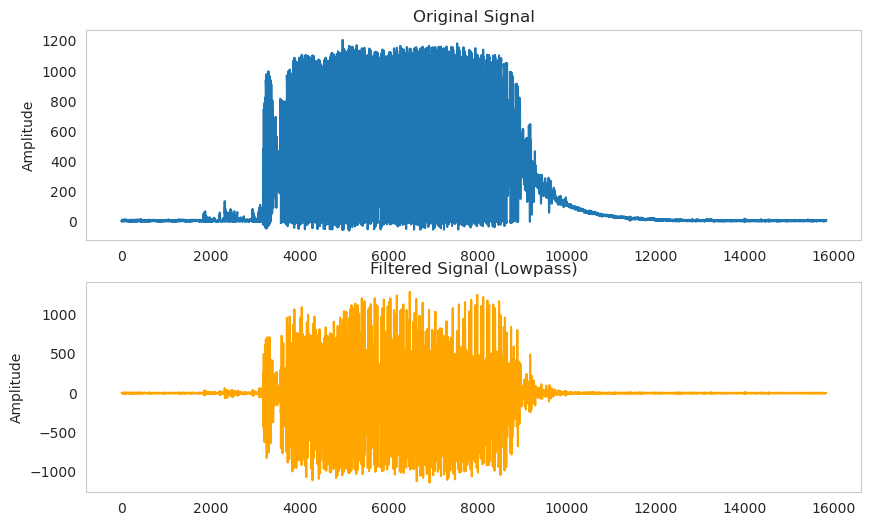

In [16]:
# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(data, label='Original Signal')
plt.title('Original Signal')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(y_highpass, label='Filtered Signal', color='orange')
plt.title('Filtered Signal (Lowpass)')
plt.ylabel('Amplitude')
plt.grid()

In [17]:
display.Audio(y_highpass, rate=16e3)

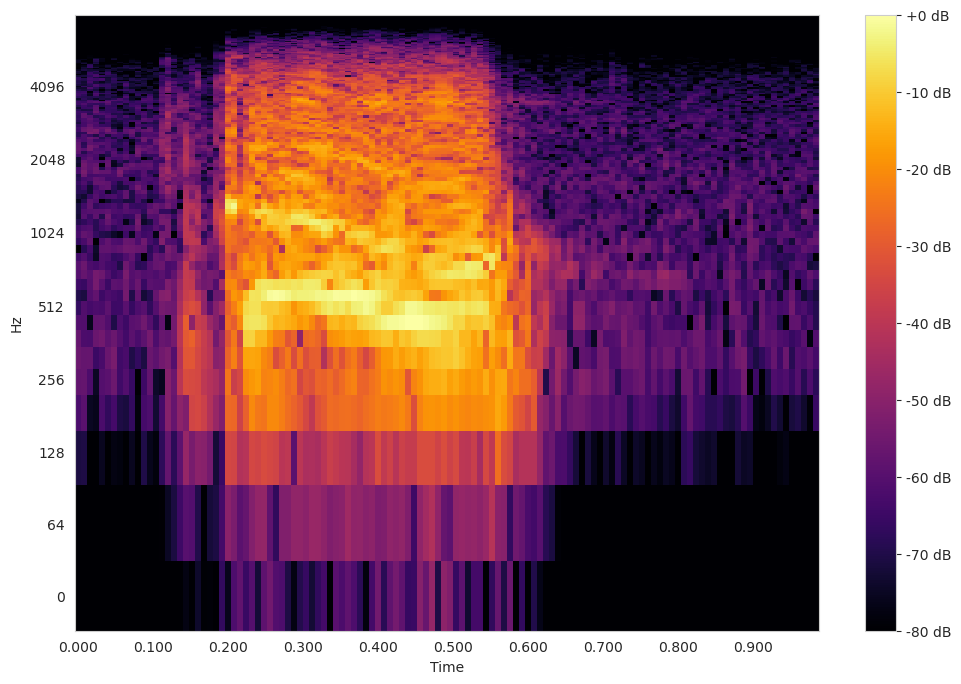

In [18]:
D = librosa.stft(y_highpass, n_fft=256, hop_length=128, window='hann')

# Convert the complex-valued STFT to a magnitude spectrogram
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
# Plot the spectrogram
plt.figure(figsize=(12, 8))
librosa.display.specshow(S_db, x_axis='time', y_axis='log', sr=16000, cmap='inferno', hop_length=128)
plt.colorbar(format='%+2.0f dB')
plt.show()

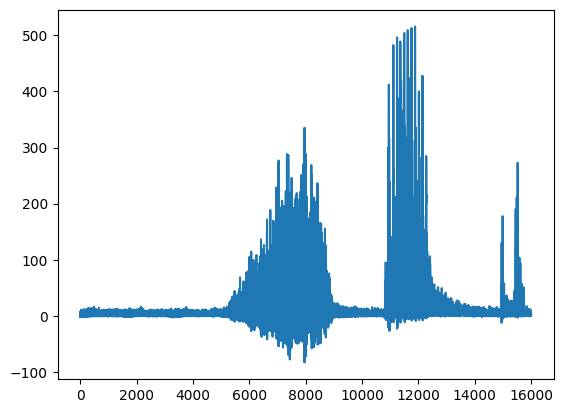

In [61]:
plt.plot(selected)